In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'OSnetbin2d29V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d29V0.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
loading weights
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 21s 586us/step - loss: 0.2346 - acc: 0.9993 - val_loss: 0.3221 - val_acc: 0.9884

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.32205324972724214, 'val_acc': 0.988414963149221, 'loss': 0.23460205779766638, 'acc': 0.9993070191773439, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

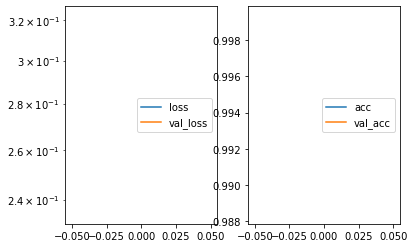

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.5573334]]
True positional value X 0.6851851851851852
Y [[0.5421051]]
True positional value Y 0.6851851851851852
H [[0.19646467]]
True positional value H 0.24074074074074073
W [[0.18832377]]
True positional value W 0.2777777777777778


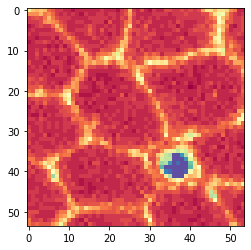

Epoch 2/250
36076/36076 [==============================] - 17s 466us/step - loss: 0.2361 - acc: 0.9985 - val_loss: 0.3207 - val_acc: 0.9863

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3207066174304253, 'val_acc': 0.9863085933833954, 'loss': 0.23605135420577095, 'acc': 0.9985308806097075, 'lr': 1e-04}


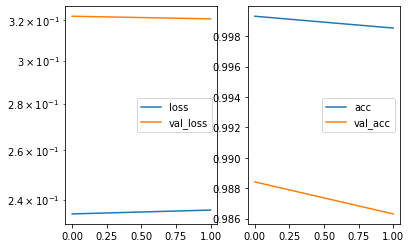

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.40492448]]
True positional value X 0.5
Y [[0.3808955]]
True positional value Y 0.5
H [[0.32852283]]
True positional value H 0.4444444444444444
W [[0.31903636]]
True positional value W 0.5740740740740741


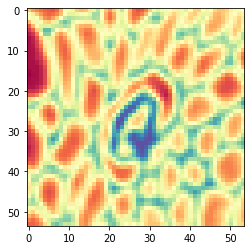

Epoch 3/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2344 - acc: 0.9990 - val_loss: 0.3340 - val_acc: 0.9826

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.33399923017867433, 'val_acc': 0.9826224389799398, 'loss': 0.2344393478087938, 'acc': 0.9990298268482815, 'lr': 1e-04}


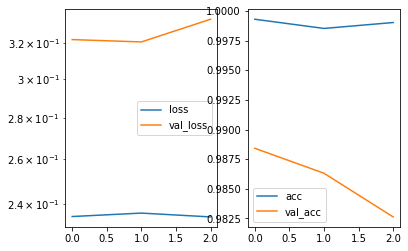

Predicted cell: NonMatureP1 Probability: [[0.99982893]]
True Cell type: NonMatureP1
X [[0.364738]]
True positional value X 0.5
Y [[0.40501744]]
True positional value Y 0.5
H [[0.23618832]]
True positional value H 0.2962962962962963
W [[0.24013849]]
True positional value W 0.3333333333333333


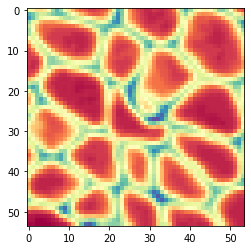

Epoch 4/250
36076/36076 [==============================] - 17s 470us/step - loss: 0.2336 - acc: 0.9993 - val_loss: 0.3067 - val_acc: 0.9884

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3067125164407878, 'val_acc': 0.988414964216392, 'loss': 0.2335738294658461, 'acc': 0.9992515807115314, 'lr': 1e-04}


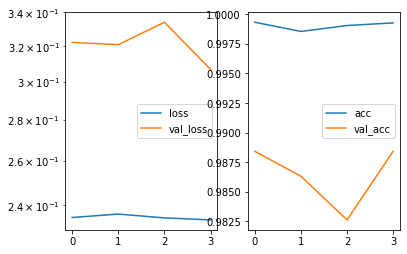

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.25986418]]
True positional value X 0.3148148148148148
Y [[0.528625]]
True positional value Y 0.6851851851851852
H [[0.47182488]]
True positional value H 0.5555555555555556
W [[0.43436775]]
True positional value W 0.5


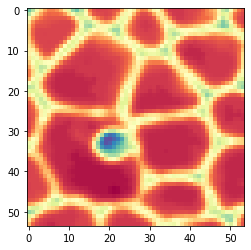

Epoch 5/250
36076/36076 [==============================] - 17s 471us/step - loss: 0.2335 - acc: 0.9993 - val_loss: 0.3094 - val_acc: 0.9905

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3093817107705081, 'val_acc': 0.9905213350180013, 'loss': 0.23350289401378635, 'acc': 0.9992515807115314, 'lr': 1e-04}


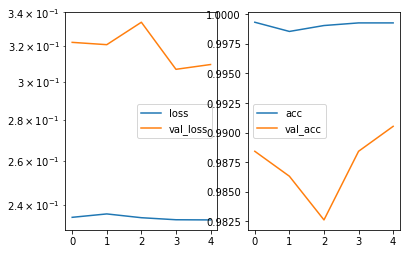

Predicted cell: MatureP1 Probability: [[0.9999993]]
True Cell type: MatureP1
X [[0.5344929]]
True positional value X 0.6851851851851852
Y [[0.39368922]]
True positional value Y 0.5
H [[0.29244637]]
True positional value H 0.3333333333333333
W [[0.19078138]]
True positional value W 0.24074074074074073


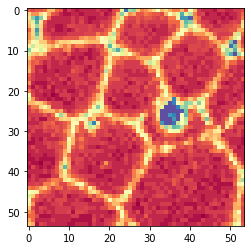

Epoch 6/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2322 - acc: 0.9994 - val_loss: 0.3015 - val_acc: 0.9910

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3014615838812677, 'val_acc': 0.9910479253565029, 'loss': 0.23222688334633737, 'acc': 0.9994178961089688, 'lr': 1e-04}


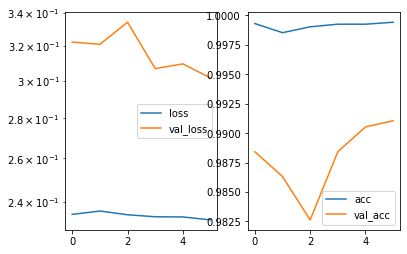

Predicted cell: Normal Probability: [[0.99999976]]
True Cell type: Normal
X [[0.4047907]]
True positional value X 0.5
Y [[0.40615076]]
True positional value Y 0.5
H [[0.21155795]]
True positional value H 0.24074074074074073
W [[0.18186513]]
True positional value W 0.18518518518518517


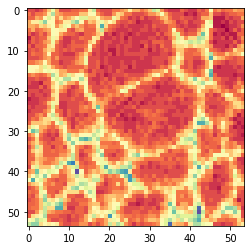

Epoch 7/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2321 - acc: 0.9993 - val_loss: 0.3196 - val_acc: 0.9784

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3195514111785025, 'val_acc': 0.9784096952737664, 'loss': 0.23211695102012161, 'acc': 0.9993347384102501, 'lr': 1e-04}


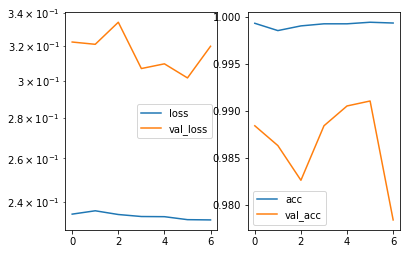

Predicted cell: MatureP1 Probability: [[0.99948823]]
True Cell type: MatureP1
X [[0.55571276]]
True positional value X 0.6851851851851852
Y [[0.25115842]]
True positional value Y 0.3148148148148148
H [[0.28171977]]
True positional value H 0.4074074074074074
W [[0.19101053]]
True positional value W 0.25925925925925924


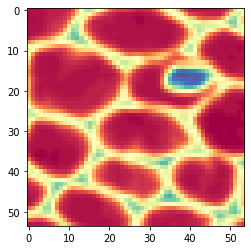

Epoch 8/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2322 - acc: 0.9992 - val_loss: 0.3058 - val_acc: 0.9910

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3058073373139689, 'val_acc': 0.9910479243207191, 'loss': 0.2322479541020986, 'acc': 0.9992238614786252, 'lr': 1e-04}


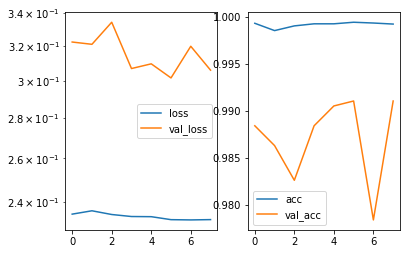

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.32683077]]
True positional value X 0.5
Y [[0.41664696]]
True positional value Y 0.5
H [[0.15816157]]
True positional value H 0.18518518518518517
W [[0.21479777]]
True positional value W 0.24074074074074073


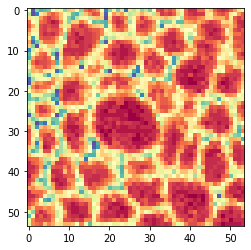

Epoch 9/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2315 - acc: 0.9995 - val_loss: 0.3047 - val_acc: 0.9910

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30474253128301854, 'val_acc': 0.9910479243207191, 'loss': 0.23146790725512864, 'acc': 0.9995010538076876, 'lr': 1e-04}


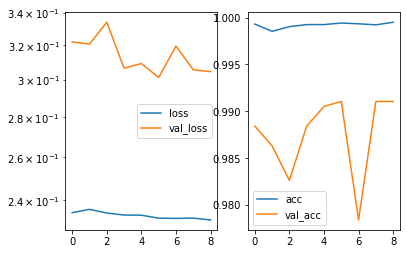

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.38572297]]
True positional value X 0.5
Y [[0.23862794]]
True positional value Y 0.3148148148148148
H [[0.37622482]]
True positional value H 0.4074074074074074
W [[0.29673433]]
True positional value W 0.3888888888888889


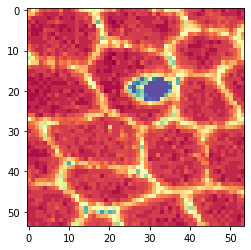

Epoch 10/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2309 - acc: 0.9994 - val_loss: 0.2975 - val_acc: 0.9900

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2975463798919937, 'val_acc': 0.9899947384020227, 'loss': 0.23091591383436988, 'acc': 0.9993901768760626, 'lr': 1e-04}


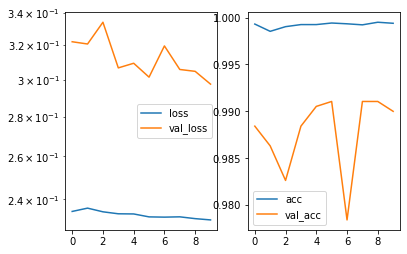

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.5434146]]
True positional value X 0.6851851851851852
Y [[0.25791693]]
True positional value Y 0.3148148148148148
H [[0.28063604]]
True positional value H 0.3148148148148148
W [[0.23606685]]
True positional value W 0.2962962962962963


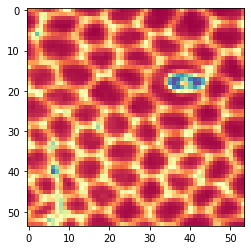

Epoch 11/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2309 - acc: 0.9994 - val_loss: 0.2937 - val_acc: 0.9905

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2937153441897187, 'val_acc': 0.9905213318792627, 'loss': 0.23090267099777972, 'acc': 0.9993901768760626, 'lr': 1e-04}


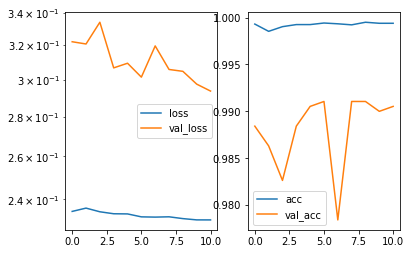

Predicted cell: MacroCheate Probability: [[0.9999995]]
True Cell type: MacroCheate
X [[0.5474426]]
True positional value X 0.6851851851851873
Y [[0.39738363]]
True positional value Y 0.5
H [[0.54819304]]
True positional value H 0.7407407407407407
W [[0.41859135]]
True positional value W 0.5925925925925926


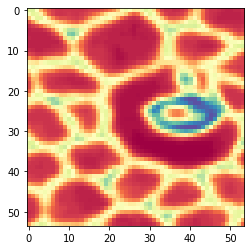

Epoch 12/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2306 - acc: 0.9994 - val_loss: 0.3022 - val_acc: 0.9895

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30223219163358805, 'val_acc': 0.98946814699635, 'loss': 0.23058147090364817, 'acc': 0.9993624576431563, 'lr': 1e-04}


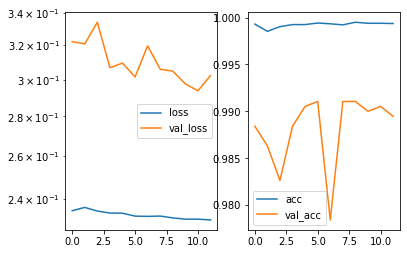

Predicted cell: Normal Probability: [[0.9999765]]
True Cell type: Normal
X [[0.36235988]]
True positional value X 0.5
Y [[0.32714015]]
True positional value Y 0.5
H [[0.24775048]]
True positional value H 0.37037037037037035
W [[0.30387062]]
True positional value W 0.3888888888888889


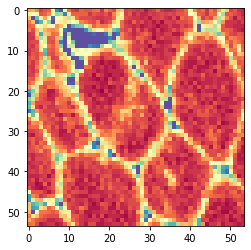

Epoch 13/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2298 - acc: 0.9994 - val_loss: 0.3024 - val_acc: 0.9895

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3023765732766202, 'val_acc': 0.98946814699635, 'loss': 0.2298038061540927, 'acc': 0.9993624576431563, 'lr': 1e-04}


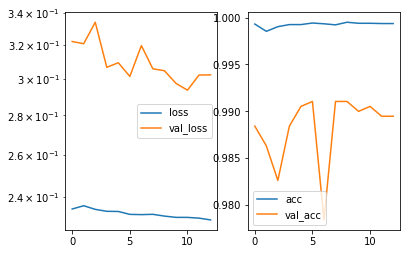

Predicted cell: Normal Probability: [[0.99998593]]
True Cell type: Normal
X [[0.41370383]]
True positional value X 0.5
Y [[0.38849837]]
True positional value Y 0.5
H [[0.2093542]]
True positional value H 0.2777777777777778
W [[0.33301902]]
True positional value W 0.3148148148148148


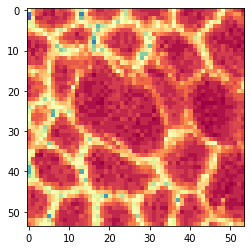

Epoch 14/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2298 - acc: 0.9995 - val_loss: 0.2982 - val_acc: 0.9900

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29824972331618055, 'val_acc': 0.9899947394378064, 'loss': 0.2298121651404712, 'acc': 0.9995287730405938, 'lr': 1e-04}


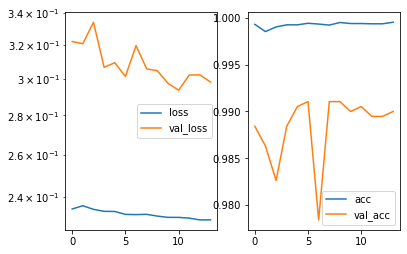

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.35615906]]
True positional value X 0.5
Y [[0.41887015]]
True positional value Y 0.5
H [[0.22283447]]
True positional value H 0.3148148148148148
W [[0.3443539]]
True positional value W 0.3333333333333333


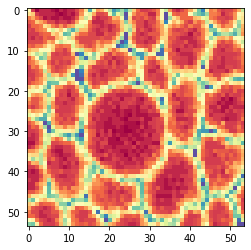

Epoch 15/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2296 - acc: 0.9993 - val_loss: 0.2959 - val_acc: 0.9905

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2959100936763597, 'val_acc': 0.9905213318792627, 'loss': 0.2296407783932902, 'acc': 0.9993347384102501, 'lr': 1e-04}


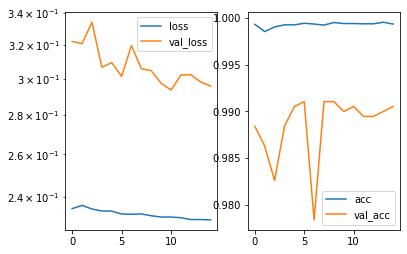

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3933786]]
True positional value X 0.5
Y [[0.4046138]]
True positional value Y 0.5
H [[0.4198351]]
True positional value H 0.4444444444444444
W [[0.34130114]]
True positional value W 0.4444444444444444


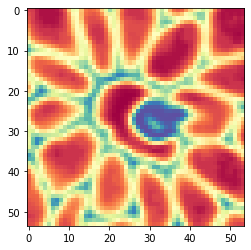

Epoch 16/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2293 - acc: 0.9992 - val_loss: 0.3116 - val_acc: 0.9874

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3116288512803932, 'val_acc': 0.9873617772305244, 'loss': 0.22929863095422293, 'acc': 0.999196142245719, 'lr': 1e-04}


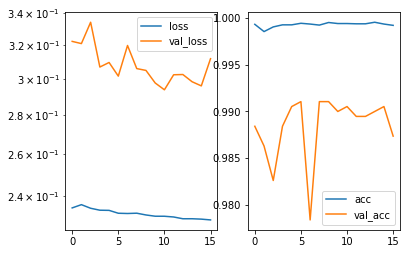

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.38029173]]
True positional value X 0.5
Y [[0.37032083]]
True positional value Y 0.5
H [[0.29602185]]
True positional value H 0.4444444444444444
W [[0.30607337]]
True positional value W 0.42592592592592593


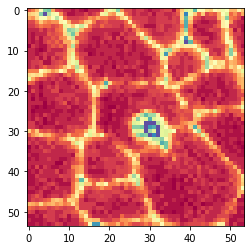

Epoch 17/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2284 - acc: 0.9994 - val_loss: 0.2955 - val_acc: 0.9900

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29549675575678697, 'val_acc': 0.9899947394378064, 'loss': 0.2284435815204603, 'acc': 0.9994178961089688, 'lr': 1e-04}


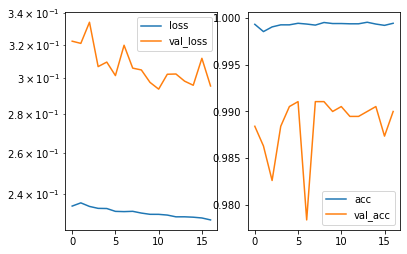

Predicted cell: Normal Probability: [[0.9999974]]
True Cell type: Normal
X [[0.40520278]]
True positional value X 0.5
Y [[0.41625637]]
True positional value Y 0.5
H [[0.19957376]]
True positional value H 0.3148148148148148
W [[0.33828956]]
True positional value W 0.3888888888888889


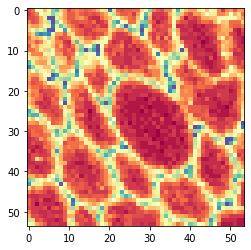

Epoch 18/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2289 - acc: 0.9993 - val_loss: 0.2994 - val_acc: 0.9900

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29939717722918374, 'val_acc': 0.9899947394378064, 'loss': 0.22893559857533793, 'acc': 0.9993347384102501, 'lr': 1e-04}


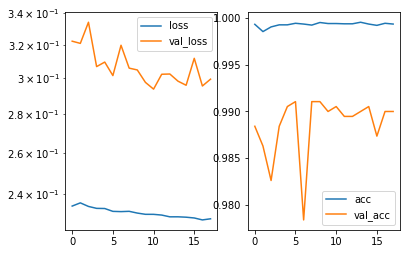

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4114615]]
True positional value X 0.5
Y [[0.22465873]]
True positional value Y 0.3148148148148148
H [[0.31349462]]
True positional value H 0.37037037037037035
W [[0.34249648]]
True positional value W 0.4444444444444444


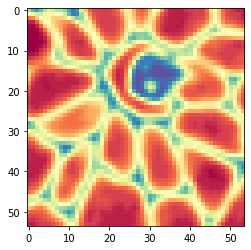

Epoch 19/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2296 - acc: 0.9991 - val_loss: 0.2990 - val_acc: 0.9905

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2990466334149359, 'val_acc': 0.9905213350180013, 'loss': 0.22961698073163928, 'acc': 0.9990575460811877, 'lr': 1e-04}


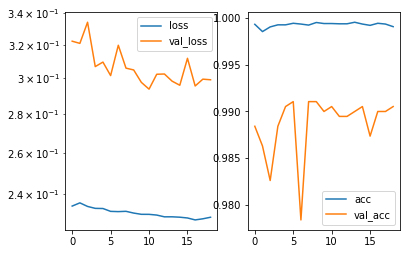

Predicted cell: MacroCheate Probability: [[0.99980396]]
True Cell type: MacroCheate
X [[0.5377566]]
True positional value X 0.6851851851851852
Y [[0.23344907]]
True positional value Y 0.3148148148148148
H [[0.5168277]]
True positional value H 0.7037037037037037
W [[0.40821567]]
True positional value W 0.5


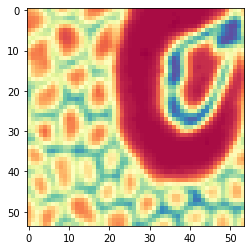

Epoch 20/250
36076/36076 [==============================] - 17s 466us/step - loss: 0.2281 - acc: 0.9994 - val_loss: 0.3015 - val_acc: 0.9900

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3015439942863629, 'val_acc': 0.9899947384020227, 'loss': 0.22814449874455178, 'acc': 0.9993901768760626, 'lr': 1e-04}


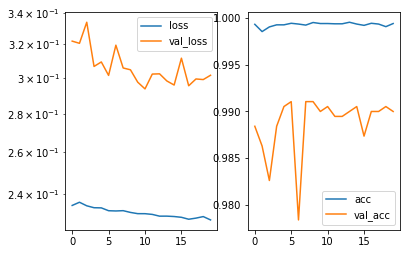

Predicted cell: NonMatureP1 Probability: [[0.9999982]]
True Cell type: NonMatureP1
X [[0.2768915]]
True positional value X 0.3148148148148148
Y [[0.39054564]]
True positional value Y 0.5
H [[0.31176373]]
True positional value H 0.3333333333333333
W [[0.33203074]]
True positional value W 0.3333333333333333


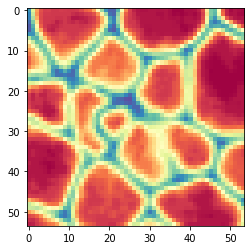

Epoch 21/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2273 - acc: 0.9993 - val_loss: 0.2949 - val_acc: 0.9910

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2948832233809621, 'val_acc': 0.9910479243207191, 'loss': 0.22730140055589976, 'acc': 0.9993347384102501, 'lr': 1e-04}


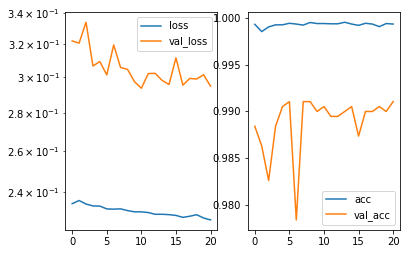

Predicted cell: MacroCheate Probability: [[0.99999785]]
True Cell type: MacroCheate
X [[0.22529528]]
True positional value X 0.3148148148148148
Y [[0.53898966]]
True positional value Y 0.6851851851851852
H [[0.21985373]]
True positional value H 0.2962962962962963
W [[0.22789812]]
True positional value W 0.35185185185185186


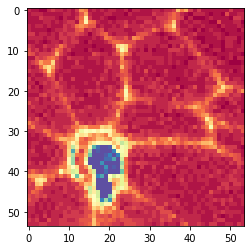

Epoch 22/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2271 - acc: 0.9994 - val_loss: 0.2943 - val_acc: 0.9905

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2943074938308069, 'val_acc': 0.9905213318792627, 'loss': 0.22709071002086895, 'acc': 0.9993901768760626, 'lr': 1e-04}


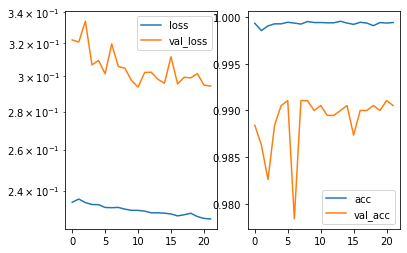

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.24912906]]
True positional value X 0.3148148148148148
Y [[0.59864867]]
True positional value Y 0.6851851851851852
H [[0.5037531]]
True positional value H 0.6851851851851852
W [[0.49955758]]
True positional value W 0.6666666666666666


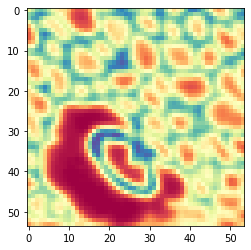

Epoch 23/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2269 - acc: 0.9994 - val_loss: 0.2986 - val_acc: 0.9910

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2985560204588532, 'val_acc': 0.9910479243207191, 'loss': 0.2269089822659988, 'acc': 0.9993624576431563, 'lr': 1e-04}


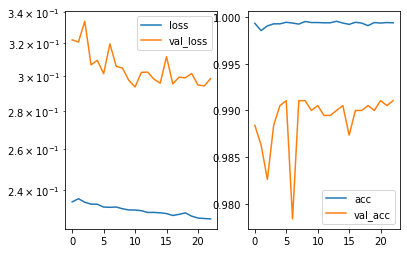

Predicted cell: MacroCheate Probability: [[0.99962556]]
True Cell type: MacroCheate
X [[0.26641345]]
True positional value X 0.3148148148148148
Y [[0.52064145]]
True positional value Y 0.6851851851851852
H [[0.40191108]]
True positional value H 0.5555555555555556
W [[0.38083524]]
True positional value W 0.5185185185185185


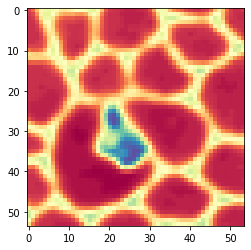

Epoch 24/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2268 - acc: 0.9993 - val_loss: 0.2912 - val_acc: 0.9905

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2912027097928518, 'val_acc': 0.9905213350180013, 'loss': 0.2267553118726792, 'acc': 0.9993347384102501, 'lr': 1e-04}


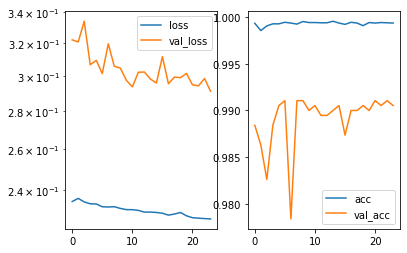

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.55769795]]
True positional value X 0.6851851851851852
Y [[0.4021725]]
True positional value Y 0.5
H [[0.4320158]]
True positional value H 0.46296296296296297
W [[0.6175462]]
True positional value W 0.7222222222222222


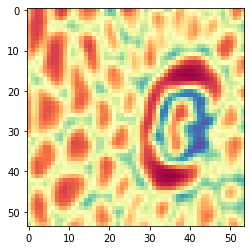

Epoch 25/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2261 - acc: 0.9994 - val_loss: 0.2996 - val_acc: 0.9916

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2996330846919079, 'val_acc': 0.9915745177979592, 'loss': 0.22613467305340224, 'acc': 0.9993901768760626, 'lr': 1e-04}


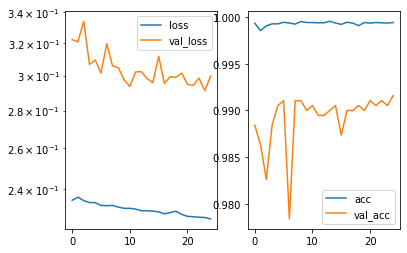

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.36570954]]
True positional value X 0.5
Y [[0.42320538]]
True positional value Y 0.5
H [[0.1431891]]
True positional value H 0.24074074074074073
W [[0.16605158]]
True positional value W 0.2962962962962963


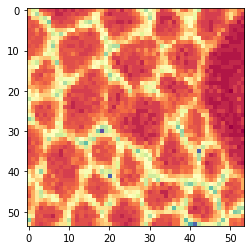

Epoch 26/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2256 - acc: 0.9994 - val_loss: 0.3066 - val_acc: 0.9884

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30660119531906677, 'val_acc': 0.9884149621134372, 'loss': 0.22559957208562312, 'acc': 0.9994456153418751, 'lr': 1e-04}


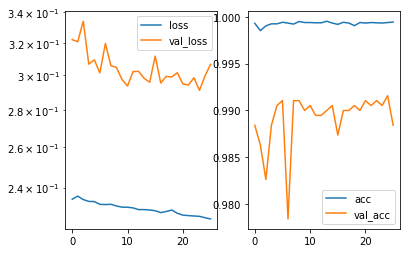

Predicted cell: MatureP1 Probability: [[0.9999105]]
True Cell type: MatureP1
X [[0.27546594]]
True positional value X 0.3148148148148148
Y [[0.5449255]]
True positional value Y 0.6851851851851852
H [[0.34786582]]
True positional value H 0.3888888888888889
W [[0.31614718]]
True positional value W 0.37037037037037035


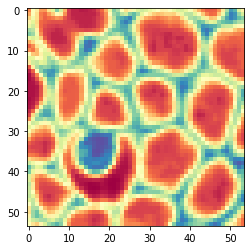

Epoch 27/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2255 - acc: 0.9994 - val_loss: 0.3264 - val_acc: 0.9800

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3264065623408936, 'val_acc': 0.9799894757368741, 'loss': 0.22550040247210618, 'acc': 0.9993624576431563, 'lr': 1e-04}


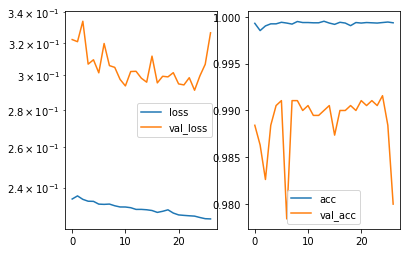

Predicted cell: Normal Probability: [[0.9999974]]
True Cell type: Normal
X [[0.38545066]]
True positional value X 0.5
Y [[0.41276836]]
True positional value Y 0.5
H [[0.23822817]]
True positional value H 0.18518518518518517
W [[0.2766947]]
True positional value W 0.25925925925925924


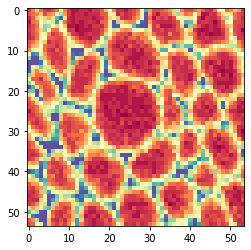

Epoch 28/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2277 - acc: 0.9988 - val_loss: 0.3134 - val_acc: 0.9810

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3134231090451492, 'val_acc': 0.9810426658300929, 'loss': 0.22770061103265873, 'acc': 0.9987803537058637, 'lr': 1e-04}


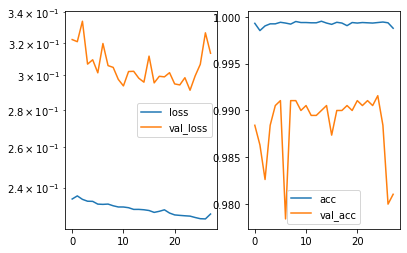

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.42535028]]
True positional value X 0.5
Y [[0.4151877]]
True positional value Y 0.5
H [[0.16321158]]
True positional value H 0.14814814814814814
W [[0.21481922]]
True positional value W 0.16666666666666666


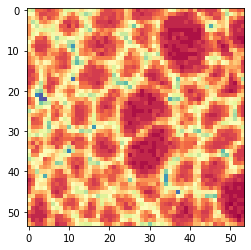

Epoch 29/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2255 - acc: 0.9993 - val_loss: 0.2884 - val_acc: 0.9921

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28839388823998857, 'val_acc': 0.9921011092036319, 'loss': 0.2255019917448049, 'acc': 0.9992792999444376, 'lr': 1e-04}


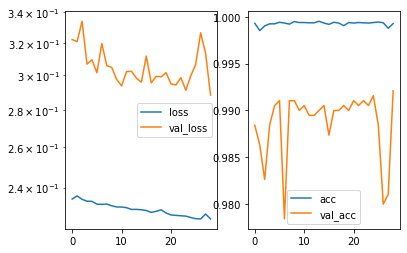

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.23225477]]
True positional value X 0.3148148148148148
Y [[0.5242599]]
True positional value Y 0.6851851851851852
H [[0.409509]]
True positional value H 0.5185185185185185
W [[0.7165045]]
True positional value W 0.8888888888888888


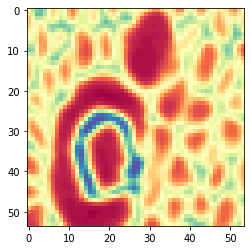

Epoch 30/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2245 - acc: 0.9993 - val_loss: 0.2904 - val_acc: 0.9926

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29035883952028313, 'val_acc': 0.992627702680872, 'loss': 0.22447665056872756, 'acc': 0.9993347384102501, 'lr': 1e-04}


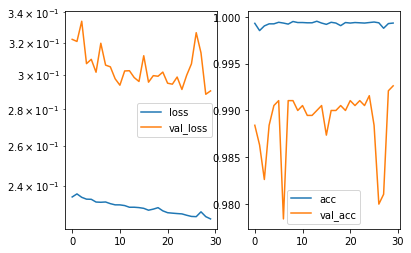

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.3892569]]
True positional value X 0.5
Y [[0.4539331]]
True positional value Y 0.5
H [[0.26576775]]
True positional value H 0.35185185185185186
W [[0.35204527]]
True positional value W 0.4444444444444444


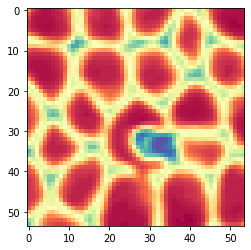

Epoch 31/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2241 - acc: 0.9993 - val_loss: 0.2984 - val_acc: 0.9905

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29839893783187166, 'val_acc': 0.9905213318792627, 'loss': 0.2241461592329779, 'acc': 0.9993070191773439, 'lr': 1e-04}


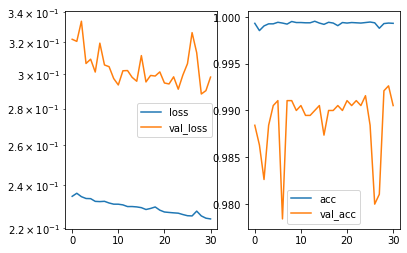

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4130456]]
True positional value X 0.5
Y [[0.4200883]]
True positional value Y 0.5
H [[0.46174508]]
True positional value H 0.5740740740740741
W [[0.47812074]]
True positional value W 0.5


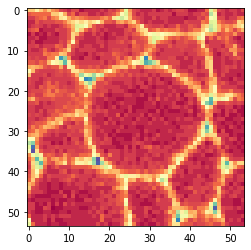

Epoch 32/250
36076/36076 [==============================] - 17s 458us/step - loss: 0.2241 - acc: 0.9993 - val_loss: 0.3054 - val_acc: 0.9889

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.305362691387746, 'val_acc': 0.9889415545548935, 'loss': 0.2240966963459375, 'acc': 0.9993070191773439, 'lr': 1e-04}


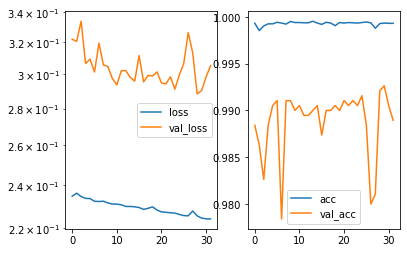

Predicted cell: MatureP1 Probability: [[0.9999988]]
True Cell type: MatureP1
X [[0.5410651]]
True positional value X 0.6851851851851852
Y [[0.258142]]
True positional value Y 0.3148148148148148
H [[0.28474846]]
True positional value H 0.35185185185185186
W [[0.2568522]]
True positional value W 0.37037037037037035


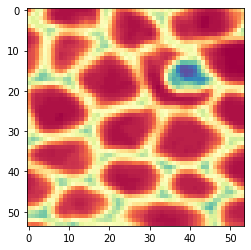

Epoch 33/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2235 - acc: 0.9993 - val_loss: 0.2926 - val_acc: 0.9895

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2926226331881312, 'val_acc': 0.98946814699635, 'loss': 0.2235238603179425, 'acc': 0.9993070191773439, 'lr': 1e-04}


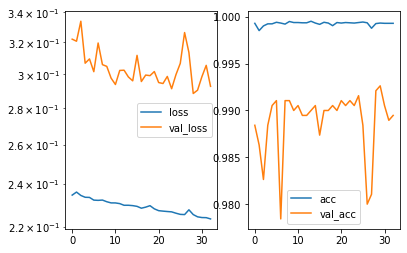

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.5423832]]
True positional value X 0.6851851851851852
Y [[0.52103853]]
True positional value Y 0.6851851851851852
H [[0.23470703]]
True positional value H 0.35185185185185186
W [[0.2756493]]
True positional value W 0.3148148148148148


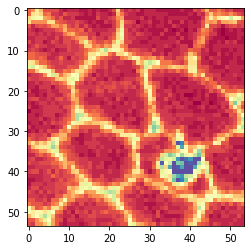

Epoch 34/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2234 - acc: 0.9993 - val_loss: 0.2949 - val_acc: 0.9889

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2949365738694953, 'val_acc': 0.9889415545548935, 'loss': 0.22336797718892593, 'acc': 0.9992792999444376, 'lr': 1e-04}


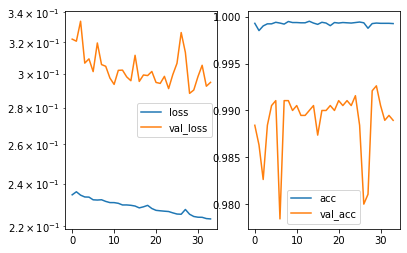

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.5270924]]
True positional value X 0.6851851851851852
Y [[0.372963]]
True positional value Y 0.5
H [[0.3860064]]
True positional value H 0.48148148148148145
W [[0.5802694]]
True positional value W 0.7037037037037037


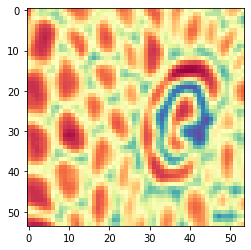

Epoch 35/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2231 - acc: 0.9994 - val_loss: 0.2939 - val_acc: 0.9842

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29394885938440013, 'val_acc': 0.9842022215460023, 'loss': 0.22311053502644254, 'acc': 0.9993624576431563, 'lr': 1e-04}


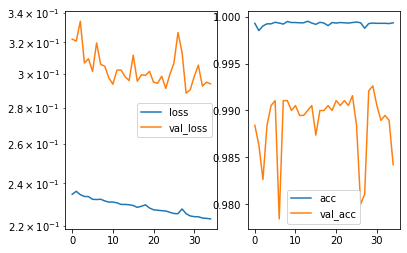

Predicted cell: MacroCheate Probability: [[0.99961483]]
True Cell type: MacroCheate
X [[0.5319322]]
True positional value X 0.6851851851851852
Y [[0.361708]]
True positional value Y 0.5
H [[0.39047822]]
True positional value H 0.5
W [[0.43111008]]
True positional value W 0.5


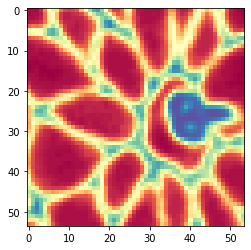

Epoch 36/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2226 - acc: 0.9993 - val_loss: 0.3004 - val_acc: 0.9905

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30042565396235077, 'val_acc': 0.9905213329150464, 'loss': 0.2225951165958788, 'acc': 0.9993347384102501, 'lr': 1e-04}


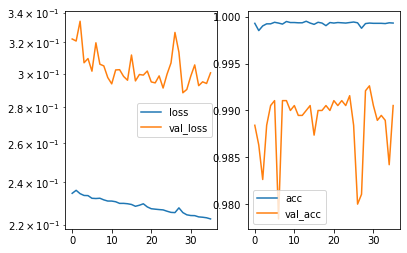

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.24398537]]
True positional value X 0.3148148148148148
Y [[0.25595072]]
True positional value Y 0.3148148148148148
H [[0.42907485]]
True positional value H 0.5370370370370371
W [[0.39277178]]
True positional value W 0.5185185185185185


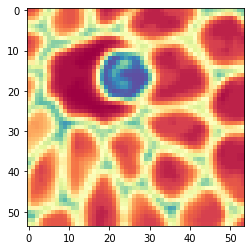

Epoch 37/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2223 - acc: 0.9994 - val_loss: 0.2920 - val_acc: 0.9879

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29204688435042764, 'val_acc': 0.9878883696719808, 'loss': 0.22233420665115564, 'acc': 0.9993624576431563, 'lr': 1e-04}


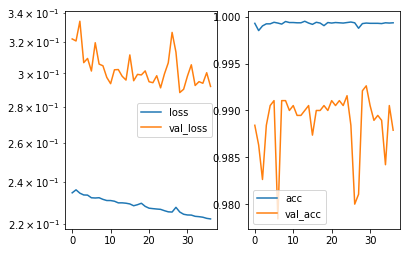

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.39856568]]
True positional value X 0.5
Y [[0.248898]]
True positional value Y 0.3148148148148148
H [[0.4777597]]
True positional value H 0.5370370370370371
W [[0.5046367]]
True positional value W 0.5740740740740741


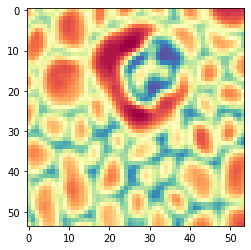

Epoch 38/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2233 - acc: 0.9990 - val_loss: 0.3018 - val_acc: 0.9900

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30179504154857173, 'val_acc': 0.98999474047359, 'loss': 0.2233444876156806, 'acc': 0.9990298266830617, 'lr': 1e-04}


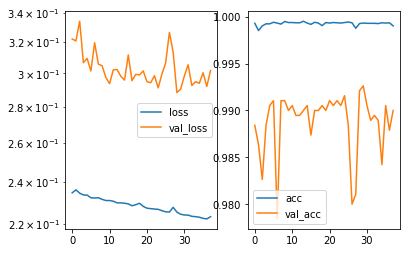

Predicted cell: Normal Probability: [[0.99999976]]
True Cell type: Normal
X [[0.41211066]]
True positional value X 0.5
Y [[0.3927568]]
True positional value Y 0.5
H [[0.23468044]]
True positional value H 0.3333333333333333
W [[0.30133528]]
True positional value W 0.4444444444444444


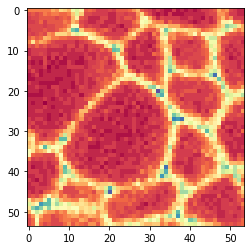

Epoch 39/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2235 - acc: 0.9990 - val_loss: 0.3098 - val_acc: 0.9837

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30976351022155363, 'val_acc': 0.9836756238628526, 'loss': 0.22346944397199522, 'acc': 0.9990021075691137, 'lr': 1e-04}


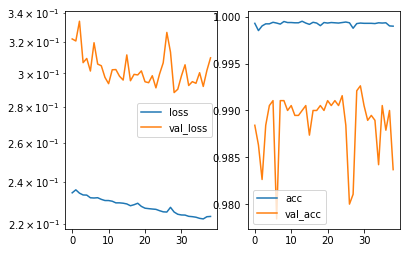

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.25831452]]
True positional value X 0.3148148148148148
Y [[0.21524899]]
True positional value Y 0.3148148148148148
H [[0.22504151]]
True positional value H 0.25925925925925924
W [[0.26684386]]
True positional value W 0.3333333333333333


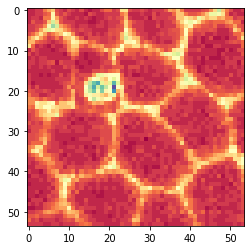

Epoch 40/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2215 - acc: 0.9995 - val_loss: 0.2958 - val_acc: 0.9905

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2957877075439883, 'val_acc': 0.9905213318792627, 'loss': 0.22147929843394135, 'acc': 0.9994733345747814, 'lr': 1e-04}


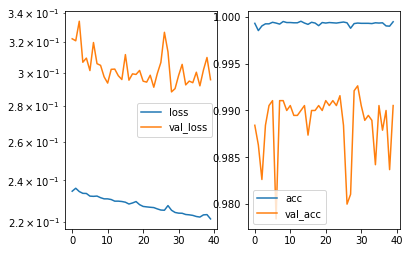

Predicted cell: Normal Probability: [[0.9708015]]
True Cell type: Normal
X [[0.37297836]]
True positional value X 0.5
Y [[0.4090166]]
True positional value Y 0.5
H [[0.1557048]]
True positional value H 0.2222222222222222
W [[0.26063702]]
True positional value W 0.25925925925925924


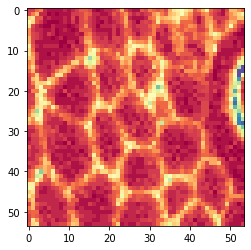

Epoch 41/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2211 - acc: 0.9992 - val_loss: 0.3045 - val_acc: 0.9842

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3045486265135289, 'val_acc': 0.9842022236175698, 'loss': 0.22114504213204392, 'acc': 0.9992238614786252, 'lr': 1e-04}


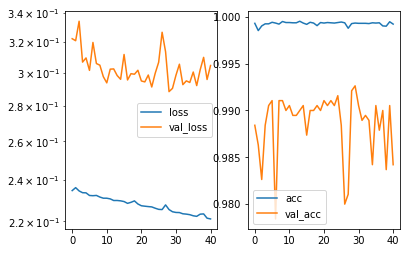

Predicted cell: MacroCheate Probability: [[0.9999889]]
True Cell type: MacroCheate
X [[0.42088595]]
True positional value X 0.5
Y [[0.4295876]]
True positional value Y 0.5
H [[0.4088377]]
True positional value H 0.5
W [[0.50537616]]
True positional value W 0.5


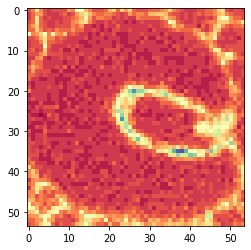

Epoch 42/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2206 - acc: 0.9993 - val_loss: 0.2908 - val_acc: 0.9916

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29075938083423697, 'val_acc': 0.9915745177979592, 'loss': 0.22060147143775655, 'acc': 0.9993070191773439, 'lr': 1e-04}


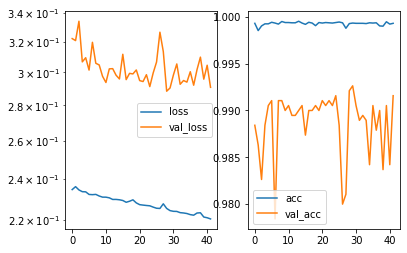

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4106865]]
True positional value X 0.5
Y [[0.41202134]]
True positional value Y 0.5
H [[0.49099502]]
True positional value H 0.5555555555555556
W [[0.41863948]]
True positional value W 0.5185185185185185


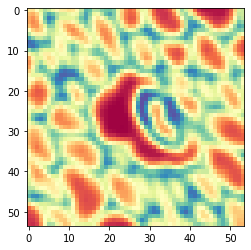

Epoch 43/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2205 - acc: 0.9994 - val_loss: 0.2890 - val_acc: 0.9926

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2889616342517437, 'val_acc': 0.992627702680872, 'loss': 0.22052611096865693, 'acc': 0.9993624576431563, 'lr': 1e-04}


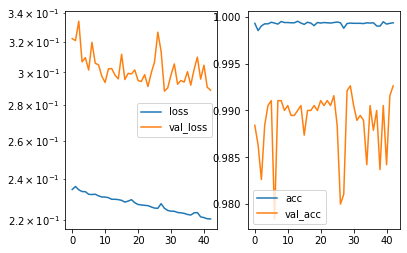

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.24151]]
True positional value X 0.3148148148148148
Y [[0.533167]]
True positional value Y 0.6851851851851852
H [[0.23299012]]
True positional value H 0.3148148148148148
W [[0.18837109]]
True positional value W 0.25925925925925924


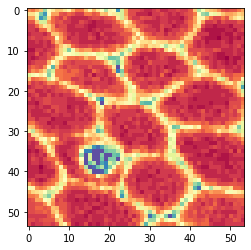

Epoch 44/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2203 - acc: 0.9994 - val_loss: 0.3040 - val_acc: 0.9879

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3040115805347698, 'val_acc': 0.9878883696719808, 'loss': 0.22027390374320746, 'acc': 0.9993624576431563, 'lr': 1e-04}


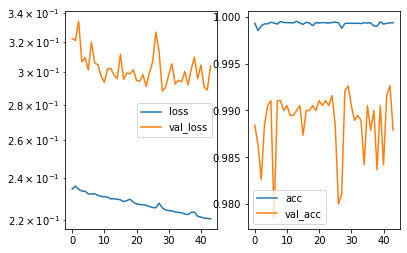

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.56720763]]
True positional value X 0.6851851851851852
Y [[0.5758831]]
True positional value Y 0.6851851851851852
H [[0.2309463]]
True positional value H 0.37037037037037035
W [[0.20318794]]
True positional value W 0.35185185185185186


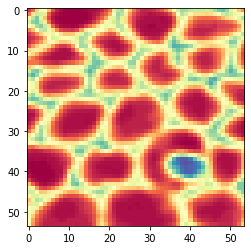

Epoch 45/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2197 - acc: 0.9994 - val_loss: 0.3034 - val_acc: 0.9884

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3034026200611884, 'val_acc': 0.9884149621134372, 'loss': 0.21972339008590416, 'acc': 0.9993624576431563, 'lr': 1e-04}


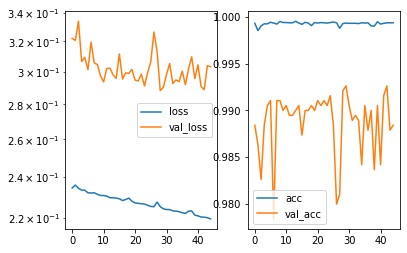

Predicted cell: NonMatureP1 Probability: [[0.9999373]]
True Cell type: NonMatureP1
X [[0.58060944]]
True positional value X 0.6851851851851852
Y [[0.55858064]]
True positional value Y 0.6851851851851852
H [[0.23637562]]
True positional value H 0.2962962962962963
W [[0.26703915]]
True positional value W 0.4074074074074074


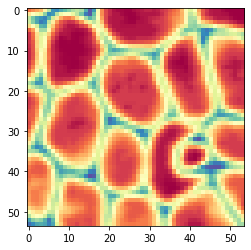

Epoch 46/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2193 - acc: 0.9993 - val_loss: 0.2844 - val_acc: 0.9921

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28438711751756574, 'val_acc': 0.9921011102394156, 'loss': 0.21925579422011135, 'acc': 0.9992792999444376, 'lr': 1e-04}


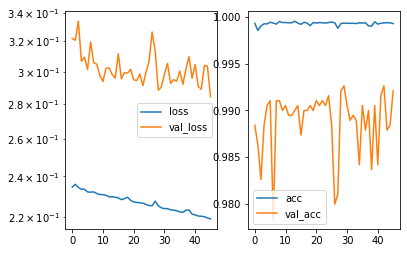

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.24799383]]
True positional value X 0.3148148148148148
Y [[0.38630706]]
True positional value Y 0.5
H [[0.6720876]]
True positional value H 0.8148148148148148
W [[0.48981982]]
True positional value W 0.6111111111111112


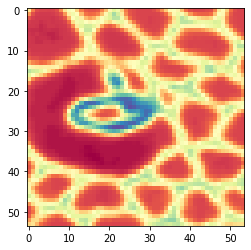

Epoch 47/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2191 - acc: 0.9993 - val_loss: 0.3077 - val_acc: 0.9889

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.3076951743239412, 'val_acc': 0.9889415555906773, 'loss': 0.21905627923379756, 'acc': 0.9993070191773439, 'lr': 1e-04}


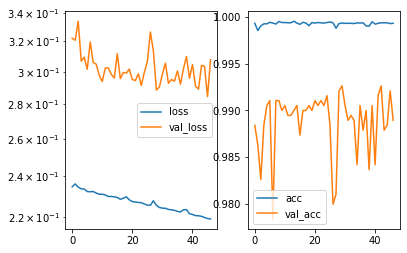

Predicted cell: NonMatureP1 Probability: [[0.99999654]]
True Cell type: NonMatureP1
X [[0.49049664]]
True positional value X 0.6851851851851852
Y [[0.37021342]]
True positional value Y 0.3148148148148148
H [[0.19280106]]
True positional value H 0.3148148148148148
W [[0.23221517]]
True positional value W 0.3333333333333333


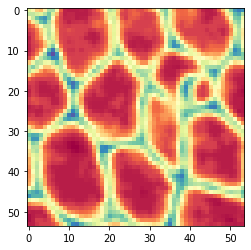

Epoch 48/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2186 - acc: 0.9993 - val_loss: 0.2830 - val_acc: 0.9921

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2829735409654775, 'val_acc': 0.9921011102394156, 'loss': 0.2185763023832524, 'acc': 0.9993347384102501, 'lr': 1e-04}


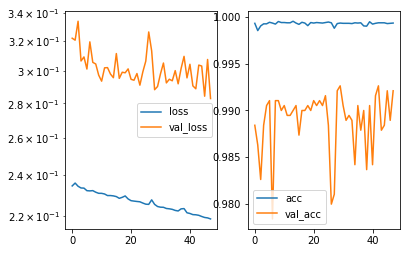

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.4061653]]
True positional value X 0.5
Y [[0.22984414]]
True positional value Y 0.3148148148148148
H [[0.3519383]]
True positional value H 0.48148148148148145
W [[0.34479517]]
True positional value W 0.35185185185185186


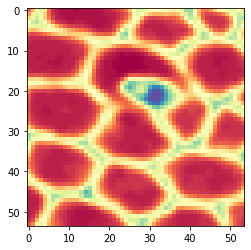

Epoch 49/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2183 - acc: 0.9993 - val_loss: 0.2925 - val_acc: 0.9900

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29252593350322575, 'val_acc': 0.9899947394378064, 'loss': 0.21834905669778792, 'acc': 0.9993070191310823, 'lr': 1e-04}


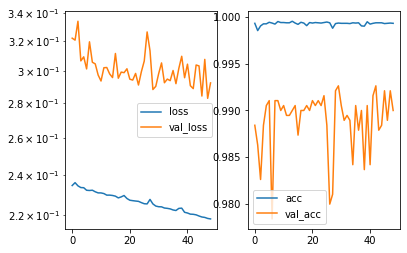

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.4040522]]
True positional value X 0.5
Y [[0.21788156]]
True positional value Y 0.3148148148148148
H [[0.3096283]]
True positional value H 0.3888888888888889
W [[0.252678]]
True positional value W 0.3888888888888889


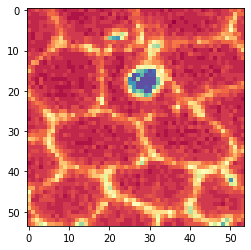

Epoch 50/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2191 - acc: 0.9991 - val_loss: 0.2887 - val_acc: 0.9905

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2886538533488972, 'val_acc': 0.9905213329150464, 'loss': 0.21908394026807834, 'acc': 0.9990852653140939, 'lr': 1e-04}


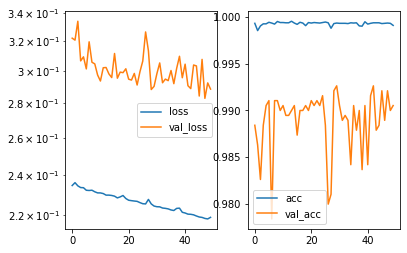

Predicted cell: NonMatureP1 Probability: [[0.9963898]]
True Cell type: NonMatureP1
X [[0.29628903]]
True positional value X 0.3148148148148148
Y [[0.4496557]]
True positional value Y 0.5
H [[0.21922465]]
True positional value H 0.3333333333333333
W [[0.19236985]]
True positional value W 0.3888888888888889


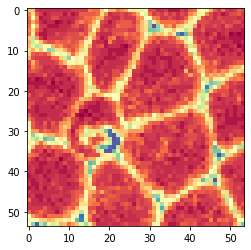

Epoch 51/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2185 - acc: 0.9992 - val_loss: 0.2831 - val_acc: 0.9900

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2831230227918359, 'val_acc': 0.9899947394378064, 'loss': 0.2185398337135612, 'acc': 0.9992238614786252, 'lr': 1e-04}


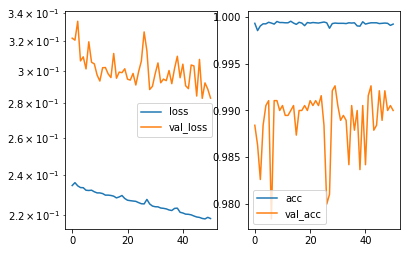

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.35680977]]
True positional value X 0.5
Y [[0.40077585]]
True positional value Y 0.5
H [[0.37084198]]
True positional value H 0.37037037037037035
W [[0.3262826]]
True positional value W 0.3333333333333333


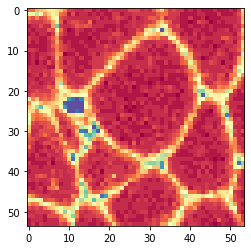

Epoch 52/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2179 - acc: 0.9994 - val_loss: 0.2882 - val_acc: 0.9926

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2882059367943463, 'val_acc': 0.992627702680872, 'loss': 0.21793356466609234, 'acc': 0.9994178961089688, 'lr': 1e-04}


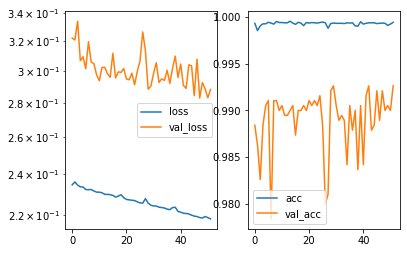

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.24337797]]
True positional value X 0.3148148148148148
Y [[0.548761]]
True positional value Y 0.6851851851851852
H [[0.37484366]]
True positional value H 0.4444444444444444
W [[0.35102755]]
True positional value W 0.37037037037037035


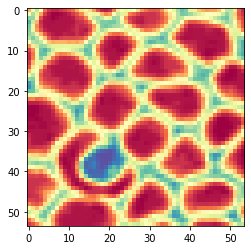

Epoch 53/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2172 - acc: 0.9994 - val_loss: 0.3042 - val_acc: 0.9884

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.30416483261385613, 'val_acc': 0.9884149621134372, 'loss': 0.2172239192812389, 'acc': 0.9994456153418751, 'lr': 1e-04}


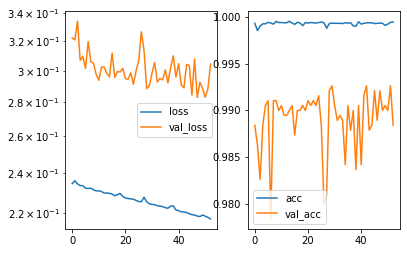

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.37834865]]
True positional value X 0.5
Y [[0.39966768]]
True positional value Y 0.5
H [[0.3371306]]
True positional value H 0.3888888888888889
W [[0.3457467]]
True positional value W 0.4074074074074074


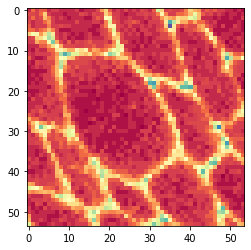

Epoch 54/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2173 - acc: 0.9994 - val_loss: 0.2819 - val_acc: 0.9895

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28189810223802886, 'val_acc': 0.9894681490993048, 'loss': 0.21726319038037886, 'acc': 0.9994456153418751, 'lr': 1e-04}


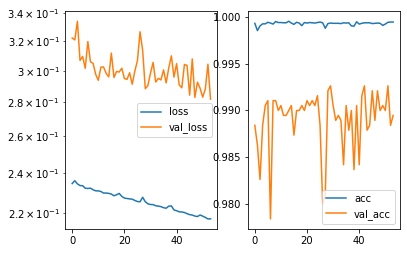

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.3974468]]
True positional value X 0.5
Y [[0.44376048]]
True positional value Y 0.5
H [[0.14807035]]
True positional value H 0.18518518518518517
W [[0.19378173]]
True positional value W 0.2222222222222222


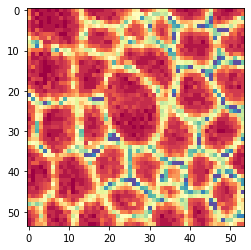

Epoch 55/250
36076/36076 [==============================] - 17s 465us/step - loss: 0.2171 - acc: 0.9992 - val_loss: 0.2823 - val_acc: 0.9926

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2823441729004475, 'val_acc': 0.992627702680872, 'loss': 0.21706441118495404, 'acc': 0.9991961421994574, 'lr': 1e-04}


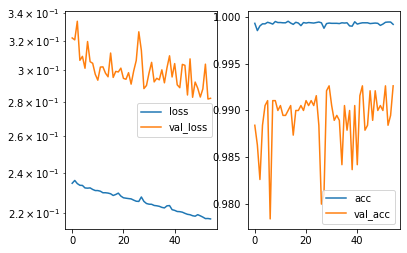

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.42654878]]
True positional value X 0.5
Y [[0.43451452]]
True positional value Y 0.5
H [[0.2752232]]
True positional value H 0.48148148148148145
W [[0.3351157]]
True positional value W 0.42592592592592593


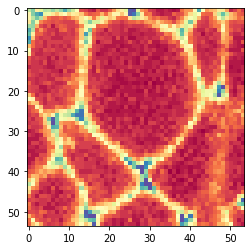

Epoch 56/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2161 - acc: 0.9994 - val_loss: 0.2894 - val_acc: 0.9910

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2893902221876047, 'val_acc': 0.9910479253565029, 'loss': 0.21614484910935094, 'acc': 0.9993901768760626, 'lr': 1e-04}


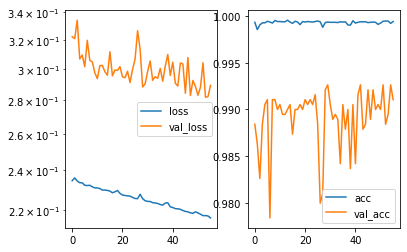

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.23135857]]
True positional value X 0.3148148148148148
Y [[0.3800133]]
True positional value Y 0.5
H [[0.6532393]]
True positional value H 0.8333333333333334
W [[0.46910954]]
True positional value W 0.5


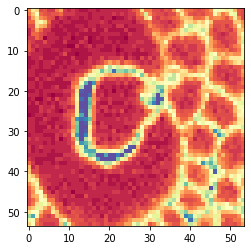

Epoch 57/250
36076/36076 [==============================] - 17s 461us/step - loss: 0.2159 - acc: 0.9993 - val_loss: 0.2871 - val_acc: 0.9905

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2870661338233144, 'val_acc': 0.9905213329150464, 'loss': 0.21587396835471906, 'acc': 0.9993347384102501, 'lr': 1e-04}


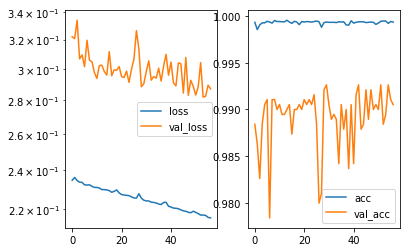

Predicted cell: MatureP1 Probability: [[0.99999917]]
True Cell type: MatureP1
X [[0.2471935]]
True positional value X 0.3148148148148148
Y [[0.38774532]]
True positional value Y 0.5
H [[0.31358847]]
True positional value H 0.4074074074074074
W [[0.24288964]]
True positional value W 0.2962962962962963


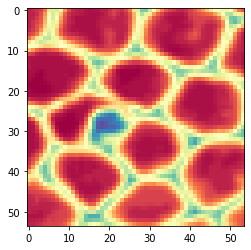

Epoch 58/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2158 - acc: 0.9994 - val_loss: 0.2884 - val_acc: 0.9884

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2883772299658819, 'val_acc': 0.9884149621134372, 'loss': 0.21580190925035606, 'acc': 0.9993624576431563, 'lr': 1e-04}


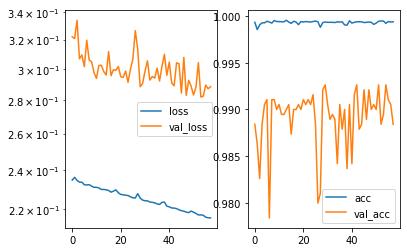

Predicted cell: MatureP1 Probability: [[0.9988741]]
True Cell type: MatureP1
X [[0.58324337]]
True positional value X 0.6851851851851852
Y [[0.260086]]
True positional value Y 0.3148148148148148
H [[0.3138916]]
True positional value H 0.3888888888888889
W [[0.2513693]]
True positional value W 0.3148148148148148


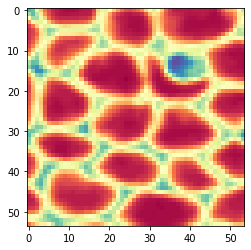

Epoch 59/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2153 - acc: 0.9993 - val_loss: 0.2819 - val_acc: 0.9889

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28185322381685507, 'val_acc': 0.9889415545548935, 'loss': 0.21533524511770868, 'acc': 0.9993070191773439, 'lr': 1e-04}


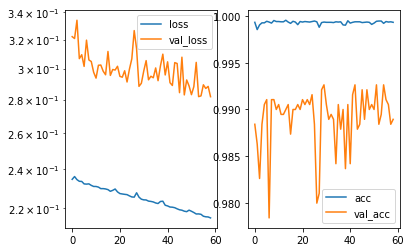

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4092454]]
True positional value X 0.5
Y [[0.35175952]]
True positional value Y 0.5
H [[0.15236549]]
True positional value H 0.16666666666666666
W [[0.22938268]]
True positional value W 0.12962962962962962


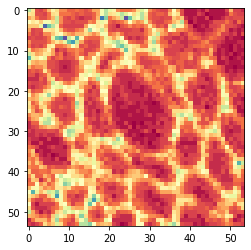

Epoch 60/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2149 - acc: 0.9994 - val_loss: 0.2811 - val_acc: 0.9900

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28105012958711423, 'val_acc': 0.9899947394378064, 'loss': 0.2149357315190471, 'acc': 0.9993901768760626, 'lr': 1e-04}


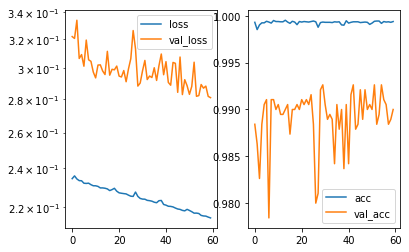

Predicted cell: NonMatureP1 Probability: [[0.99999833]]
True Cell type: NonMatureP1
X [[0.5432266]]
True positional value X 0.6851851851851852
Y [[0.43318972]]
True positional value Y 0.5
H [[0.30246803]]
True positional value H 0.37037037037037035
W [[0.24302927]]
True positional value W 0.25925925925925924


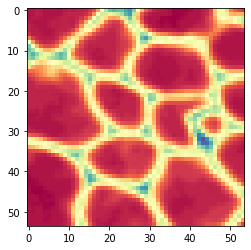

Epoch 61/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2148 - acc: 0.9994 - val_loss: 0.2846 - val_acc: 0.9916

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2845698603521591, 'val_acc': 0.9915745177979592, 'loss': 0.21477819440905171, 'acc': 0.9993901768760626, 'lr': 1e-04}


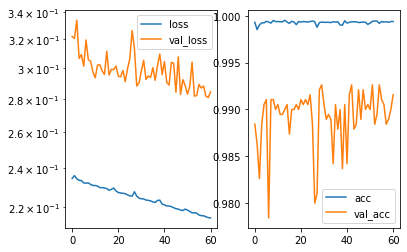

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.41446763]]
True positional value X 0.5
Y [[0.41642737]]
True positional value Y 0.5
H [[0.40039843]]
True positional value H 0.37037037037037035
W [[0.3394099]]
True positional value W 0.37037037037037035


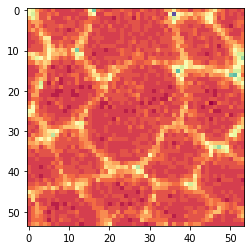

Epoch 62/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2146 - acc: 0.9994 - val_loss: 0.2866 - val_acc: 0.9921

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2866371825941617, 'val_acc': 0.9921011102394156, 'loss': 0.21463320842701522, 'acc': 0.9993624575968949, 'lr': 1e-04}


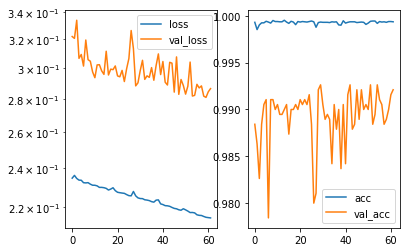

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.27032316]]
True positional value X 0.3148148148148148
Y [[0.27692765]]
True positional value Y 0.3148148148148148
H [[0.30534038]]
True positional value H 0.4074074074074074
W [[0.25111493]]
True positional value W 0.3333333333333333


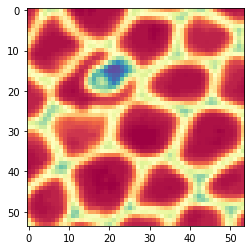

Epoch 63/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2144 - acc: 0.9993 - val_loss: 0.2913 - val_acc: 0.9910

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29134432782368513, 'val_acc': 0.9910479253565029, 'loss': 0.2144411932303221, 'acc': 0.9992515807115314, 'lr': 1e-04}


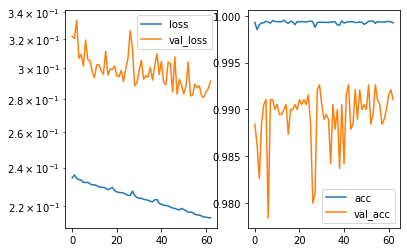

Predicted cell: NonMatureP1 Probability: [[0.9999994]]
True Cell type: NonMatureP1
X [[0.4025596]]
True positional value X 0.5
Y [[0.45524994]]
True positional value Y 0.6851851851851852
H [[0.2590478]]
True positional value H 0.37037037037037035
W [[0.24412224]]
True positional value W 0.2962962962962963


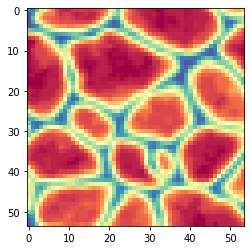

Epoch 64/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2137 - acc: 0.9994 - val_loss: 0.2790 - val_acc: 0.9900

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2790203968934978, 'val_acc': 0.9899947394378064, 'loss': 0.21373493007862035, 'acc': 0.9994178961089688, 'lr': 1e-04}


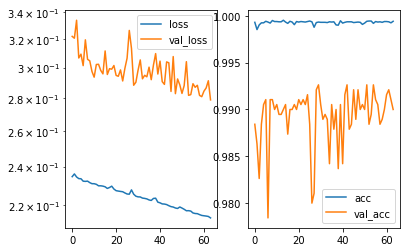

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.45289618]]
True positional value X 0.5
Y [[0.38254756]]
True positional value Y 0.5
H [[0.26749387]]
True positional value H 0.3333333333333333
W [[0.24371204]]
True positional value W 0.2037037037037037


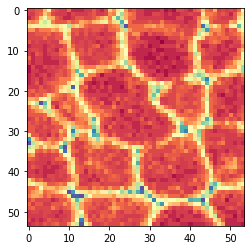

Epoch 65/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2133 - acc: 0.9994 - val_loss: 0.2806 - val_acc: 0.9921

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2805712161376766, 'val_acc': 0.9921011102394156, 'loss': 0.21331190397092015, 'acc': 0.9994456153418751, 'lr': 1e-04}


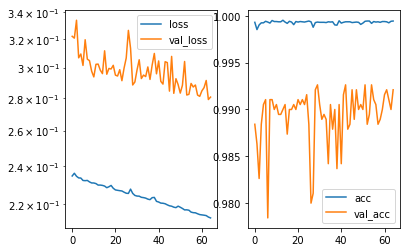

Predicted cell: NonMatureP1 Probability: [[0.9987232]]
True Cell type: NonMatureP1
X [[0.2239786]]
True positional value X 0.3148148148148148
Y [[0.25772732]]
True positional value Y 0.3148148148148148
H [[0.29980102]]
True positional value H 0.46296296296296297
W [[0.2685777]]
True positional value W 0.5


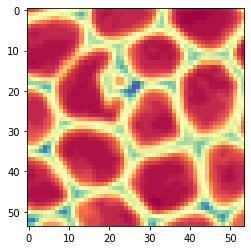

Epoch 66/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2133 - acc: 0.9994 - val_loss: 0.2853 - val_acc: 0.9905

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28530013735448767, 'val_acc': 0.9905213318792627, 'loss': 0.21333138477823424, 'acc': 0.9993901768760626, 'lr': 1e-04}


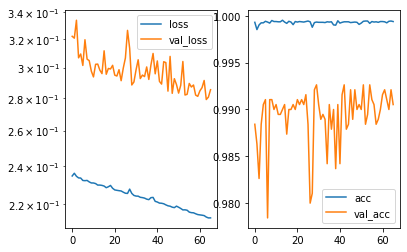

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.24620464]]
True positional value X 0.3148148148148148
Y [[0.23372474]]
True positional value Y 0.3148148148148148
H [[0.26565042]]
True positional value H 0.35185185185185186
W [[0.29374814]]
True positional value W 0.37037037037037035


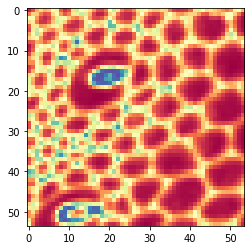

Epoch 67/250
36076/36076 [==============================] - 17s 460us/step - loss: 0.2131 - acc: 0.9994 - val_loss: 0.2794 - val_acc: 0.9900

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.27937778086647225, 'val_acc': 0.9899947394378064, 'loss': 0.2130627819202813, 'acc': 0.9993901768760626, 'lr': 1e-04}


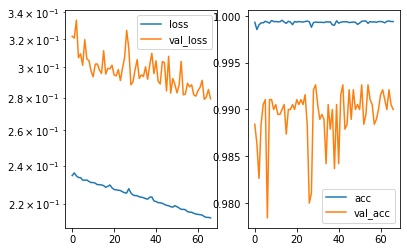

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.4073836]]
True positional value X 0.5
Y [[0.42104536]]
True positional value Y 0.5
H [[0.23664197]]
True positional value H 0.3148148148148148
W [[0.1686879]]
True positional value W 0.3333333333333333


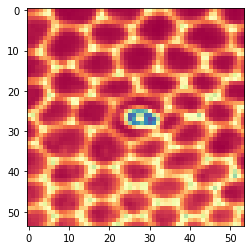

Epoch 68/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2128 - acc: 0.9994 - val_loss: 0.2918 - val_acc: 0.9905

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.29179302600259965, 'val_acc': 0.9905213318792627, 'loss': 0.21279821656326298, 'acc': 0.9993624575968949, 'lr': 1e-04}


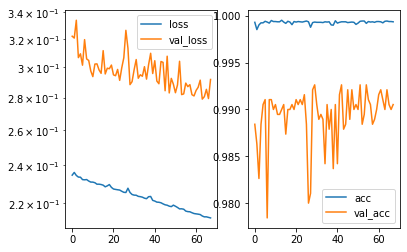

Predicted cell: MatureP1 Probability: [[0.99999905]]
True Cell type: MatureP1
X [[0.24013455]]
True positional value X 0.3148148148148148
Y [[0.3230819]]
True positional value Y 0.3148148148148148
H [[0.3358654]]
True positional value H 0.42592592592592593
W [[0.34758055]]
True positional value W 0.46296296296296297


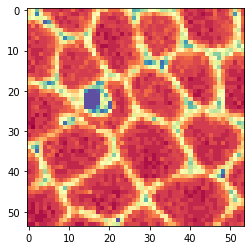

Epoch 69/250
36076/36076 [==============================] - 17s 462us/step - loss: 0.2122 - acc: 0.9995 - val_loss: 0.2853 - val_acc: 0.9916

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.2853454854564958, 'val_acc': 0.9915745177979592, 'loss': 0.21215783362114213, 'acc': 0.9994733345747814, 'lr': 1e-04}


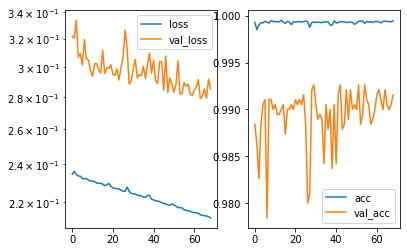

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.5279174]]
True positional value X 0.6851851851851852
Y [[0.5713004]]
True positional value Y 0.6851851851851852
H [[0.5386159]]
True positional value H 0.5555555555555556
W [[0.41213042]]
True positional value W 0.4444444444444444


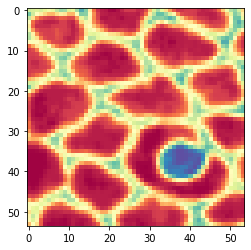

Epoch 70/250
36076/36076 [==============================] - 17s 464us/step - loss: 0.2122 - acc: 0.9994 - val_loss: 0.2805 - val_acc: 0.9916

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28046633118764547, 'val_acc': 0.9915745177979592, 'loss': 0.21215735535483388, 'acc': 0.9994178961089688, 'lr': 1e-04}


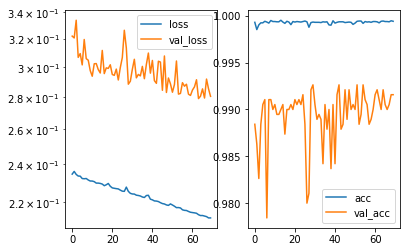

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.36330366]]
True positional value X 0.5
Y [[0.4051668]]
True positional value Y 0.5
H [[0.34397867]]
True positional value H 0.2962962962962963
W [[0.3153562]]
True positional value W 0.2777777777777778


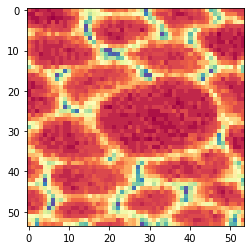

Epoch 71/250
36076/36076 [==============================] - 17s 463us/step - loss: 0.2115 - acc: 0.9994 - val_loss: 0.2810 - val_acc: 0.9916

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d29V0.h5
{'val_loss': 0.28099821125789337, 'val_acc': 0.9915745167621756, 'loss': 0.21152005249214934, 'acc': 0.9993624576431563, 'lr': 1e-04}


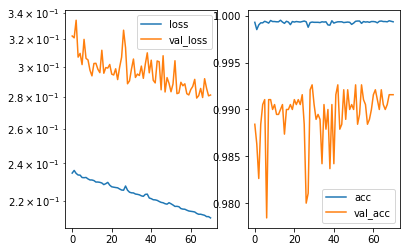

Predicted cell: NonMatureP1 Probability: [[0.99996686]]
True Cell type: NonMatureP1
X [[0.39746633]]
True positional value X 0.5
Y [[0.2276921]]
True positional value Y 0.3148148148148148
H [[0.31833354]]
True positional value H 0.42592592592592593
W [[0.31771243]]
True positional value W 0.4444444444444444


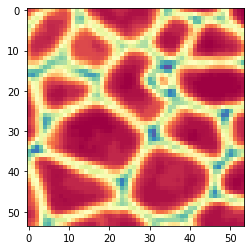

Epoch 72/250
 8900/36076 [======>.......................] - ETA: 12s - loss: 0.2112 - acc: 0.9997

In [ ]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
